# Oasis Infobyte

# Intern: Kadam Disha Vishwas.

# Task 5: Sales Prediction Using Python.

In [8]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Load the dataset
df=pd.read_csv('Advertising (1).csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Conclusion : dataset contains 4 variables from which Sales is dependent while other are independent variables.

In [12]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
df.shape

(200, 5)

In [15]:
#checking whether there are any null or missing values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Conclusion: we can see that there are no any missing values so no need for data cleaning.

In [16]:
# Deleting unnecessary column
df2=df.drop("Unnamed: 0",axis=1)
df2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [17]:
# plotting the relationship between each variable.
plt.figure(figsize=(10,10))
correlation_matrix= df2.corr()
correlation_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Figure size 1000x1000 with 0 Axes>

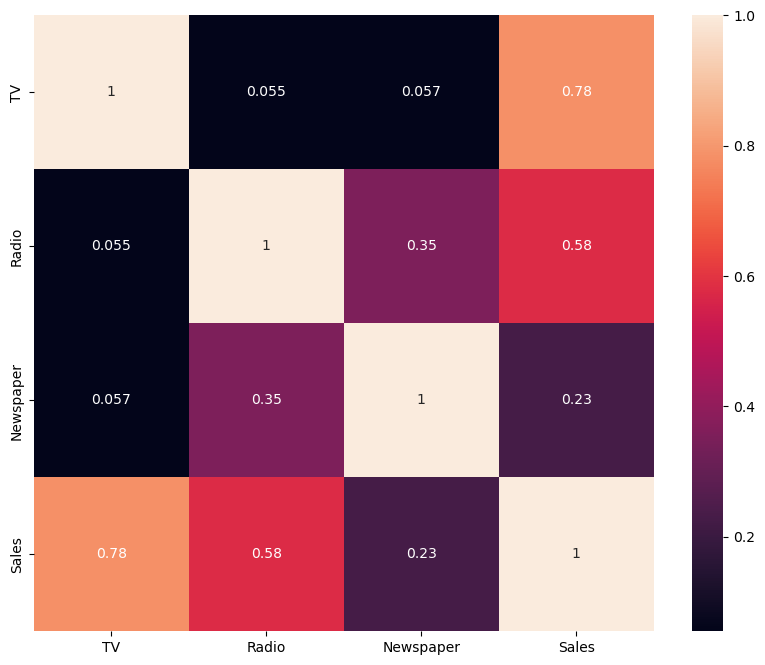

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Density'>

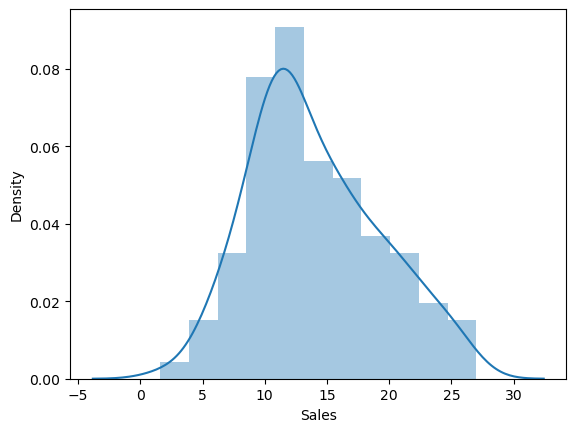

In [21]:
sns.distplot(df2['Sales'])

Conclusion: Above graph shows that target variable Sales are slightly normally skewed.

# Preparing the model

In [32]:
x=df2.drop('Sales',axis=1)
y=df2.Sales


In [33]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred= model.predict(x_test)
print(y_pred)

[12.69223455  6.5270928  15.38858511  9.62842894 14.06192583 20.20530685
 12.35574875 19.83997665 14.91536098 10.1497561  10.05120388 20.65495998
  6.47131527  5.8963247   3.48318565 11.27493828 13.24001721 16.12329904
  7.68667727 18.10050898  7.40636318 11.64283082 10.55137205  7.26035652
 22.07489434 10.11810034 10.56757674 14.84619239 10.01785943 20.5745739
  9.62335573 21.24882208 24.15620995  6.64604874 15.22215997 19.22760963
 18.5570192  19.48442906 16.24868554  9.34163361  8.01790088 18.45415198
 15.06547565 18.8474166  16.55544438 14.33136461 17.20900284 13.97747204
 16.29359359 10.55501473  9.69083618 14.85849632 21.57138158 14.33468396
  8.29359269 13.40075667  6.94755324 24.72247218 13.6555342  16.81144978]


In [37]:
y_test

50     11.4
127     8.8
37     14.7
149    10.1
19     14.6
104    20.7
179    12.6
53     21.2
162    14.9
158     7.3
82     11.3
185    22.6
182     8.7
189     6.7
108     5.3
31     11.9
4      12.9
178    11.8
121     7.0
20     18.0
172     7.6
88     12.9
166     8.0
170     8.4
128    24.7
72      8.8
180    10.5
26     15.0
144    11.4
52     22.6
79     11.0
93     22.2
183    26.2
119     6.6
85     15.2
133    19.6
184    17.6
139    20.7
95     16.9
140    10.9
24      9.7
150    16.1
114    14.6
33     17.4
23     15.5
171    14.5
41     17.1
100    11.7
152    16.6
71     12.4
186    10.3
110    13.4
42     20.7
120    15.5
191     9.9
161    13.3
10      8.6
175    27.0
77     14.2
62     15.7
Name: Sales, dtype: float64

In [38]:
residual= y_test - y_pred
residual

50    -1.292235
127    2.272907
37    -0.688585
149    0.471571
19     0.538074
104    0.494693
179    0.244251
53     1.360023
162   -0.015361
158   -2.849756
82     1.248796
185    1.945040
182    2.228685
189    0.803675
108    1.816814
31     0.625062
4     -0.340017
178   -4.323299
121   -0.686677
20    -0.100509
172    0.193637
88     1.257169
166   -2.551372
170    1.139643
128    2.625106
72    -1.318100
180   -0.067577
26     0.153808
144    1.382141
52     2.025426
79     1.376644
93     0.951178
183    2.043790
119   -0.046049
85    -0.022160
133    0.372390
184   -0.957019
139    1.215571
95     0.651314
140    1.558366
24     1.682099
150   -2.354152
114   -0.465476
33    -1.447417
23    -1.055444
171    0.168635
41    -0.109003
100   -2.277472
152    0.306406
71     1.844985
186    0.609164
110   -1.458496
42    -0.871382
120    1.165316
191    1.606407
161   -0.100757
10     1.652447
175    2.277528
77     0.544466
62    -1.111450
Name: Sales, dtype: float64

In [39]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.9205864667717337
RMSE 1.4472433065929018


Conclusion: R2 score indicates that 92% variability in the Sales are explained by the regression model.